In [4]:
import random
import numpy as np
import seaborn as sns
import math
import os
import time
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal
from scipy.stats import norm, entropy
%matplotlib inline

In [5]:
grid_len = 40
grid = np.zeros((grid_len, grid_len))

In [6]:
# legal transmitters

primary    = [123, 1357]
secondary  = [456, 789, 1248]

for t in primary:
    x = t//grid_len
    y = t%grid_len
    print(t, (x, y))
    grid[x][y] = 1
    
for t in secondary:
    x = t//grid_len
    y = t%grid_len
    print(t, (x, y))
    grid[x][y] = 0.5

123 (3, 3)
1357 (33, 37)
456 (11, 16)
789 (19, 29)
1248 (31, 8)


In [7]:
sensors = [(10, 39), (8, 7), (2, 24), (26, 33), (0, 18), (4, 13), (11, 1), (17, 36), 
           (5, 22), (38, 10), (1, 37), (13, 10), (33, 24), (6, 10), (7, 5), (14, 5)]
for s in sensors:
    grid[s[0]][s[1]] = -1

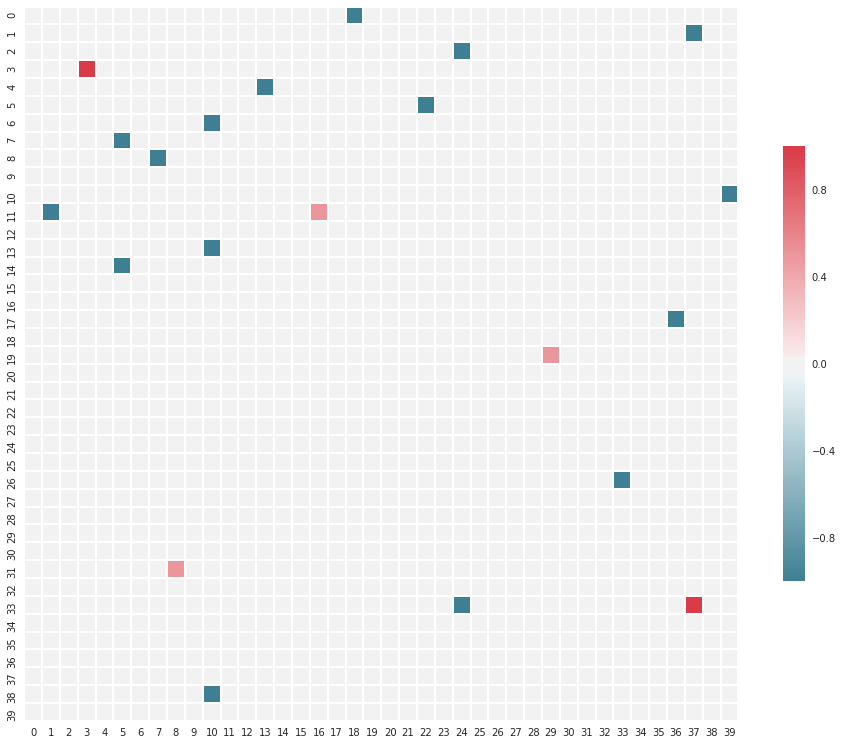

In [8]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(grid, cmap=cmap, vmax=1, center=0,
            square=True, linewidth=1, cbar_kws={"shrink": .5})

plt.show()

# Elevation

https://viewer.nationalmap.gov/theme/elevation/

# Latitude (y), Longitude (x)

In [1]:
left_up    = (-73.143383, 40.896615)
right_up   = (-73.067228, 40.896615)
left_down  = (-73.143383, 40.839021)  # here is (0, 0)
right_down = (-73.067228, 40.839021)
grid_len   = 64
long_step  = (right_up[0] - left_up[0])/grid_len
lat_step   = (right_up[1] - right_down[1])/grid_len

In [2]:
long_step, lat_step

(0.0011899218749999996, 0.0008999062499999155)

In [3]:
trans_long_lat = []  # in the end, print in (lat, long)
for i in range(grid_len):
    for j in range(grid_len):
        x = left_down[0] + i*long_step
        y = left_down[1] + j*lat_step
        trans_long_lat.append((x, y))

In [4]:
trans_long_lat

[(-73.143383, 40.839021),
 (-73.143383, 40.83992090625),
 (-73.143383, 40.8408208125),
 (-73.143383, 40.841720718750004),
 (-73.143383, 40.842620625),
 (-73.143383, 40.84352053125),
 (-73.143383, 40.844420437500006),
 (-73.143383, 40.845320343750004),
 (-73.143383, 40.84622025),
 (-73.143383, 40.84712015625),
 (-73.143383, 40.8480200625),
 (-73.143383, 40.84891996875),
 (-73.143383, 40.849819875),
 (-73.143383, 40.85071978125),
 (-73.143383, 40.851619687500005),
 (-73.143383, 40.85251959375),
 (-73.143383, 40.8534195),
 (-73.143383, 40.85431940625),
 (-73.143383, 40.8552193125),
 (-73.143383, 40.85611921875),
 (-73.143383, 40.857019125),
 (-73.143383, 40.85791903125),
 (-73.143383, 40.858818937500004),
 (-73.143383, 40.85971884375),
 (-73.143383, 40.86061875),
 (-73.143383, 40.86151865625),
 (-73.143383, 40.8624185625),
 (-73.143383, 40.86331846875),
 (-73.143383, 40.864218375),
 (-73.143383, 40.86511828125),
 (-73.143383, 40.8660181875),
 (-73.143383, 40.86691809375),
 (-73.143383, 40

In [5]:
with open('dataSplat/lat_long', 'w') as f:
    for tran in trans_long_lat:
        f.write('{}, {}, {}\n'.format(tran[1], tran[0], 30.0))